In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron, Ridge
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, \
f1_score, precision_recall_curve, r2_score, log_loss
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from skimage.io import imread
import skimage
import pylab
from skimage.io import imread, imsave
from skimage import img_as_float
from sklearn.cluster import KMeans
from numpy import mean, median, reshape
from math import log10

image = imread('parrots.jpg')

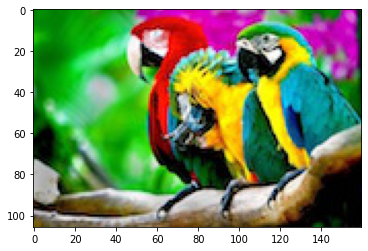

In [45]:
pylab.imshow(image)

In [46]:
X = skimage.img_as_float(image)

In [47]:
X = X.reshape((106 * 160, 3))

In [49]:
def apply_pix(X, y, func):
    clusters = dict()
    colors = dict()
    for i in range(len(X)):
        if not clusters.__contains__(y[i]):
            clusters[y[i]] = list()
        clusters[y[i]].append(X[i])     
    for i in range(len(clusters)):
        r = func(list(map(lambda x: x[0], clusters[i])))
        g = func(list(map(lambda x: x[1], clusters[i])))
        b = func(list(map(lambda x: x[2], clusters[i])))
        colors[i] = [r, g, b]
    return list(map(lambda x: colors[x], y))

def PSNR(I, K):
    res = list()
    for i in range(len(I)):
        res.append((I[i][0] - K[i][0]) ** 2 + (I[i][1] - K[i][1]) ** 2 + (I[i][2] - K[i][2]) ** 2)
    return -10 * log10(sum(res) / (3 * len(I)))


for i in range(1, 21):
    cl = KMeans(n_clusters=i, init='k-means++', random_state=241)
    y = cl.fit_predict(X)

    X_mean = apply_pix(X, y, mean)
    X_median = apply_pix(X, y, median)
    PSNR_mean = PSNR(X, X_mean)
    PSNR_median = PSNR(X, X_median)
    
    print(i, "clusters")
    print(PSNR_mean, PSNR_median)
    print()


1 clusters
10.156149665767842 9.88846727370168

2 clusters
12.439988081531494 12.083821432567802

3 clusters
13.465278201084976 13.028205854738717

4 clusters
14.616602693394006 14.293860047534073

5 clusters
15.756997259302397 15.39986585737391

6 clusters
16.76327448312264 16.3351362126095

7 clusters
17.794762073050023 17.53916196534754

8 clusters
18.517062748050467 18.22703263110955

9 clusters
19.23332398121458 18.979447448217186

10 clusters
19.74345653133153 19.560166312550187

11 clusters
20.250555161710636 20.027705795427618

12 clusters
20.671058472583546 20.427285376032405

13 clusters
21.067269383146872 20.885956593405833

14 clusters
21.354248766834782 21.213078997048687

15 clusters
21.64151163059121 21.44608400041197

16 clusters
21.90241664341755 21.744611556389412

17 clusters
22.160822685097386 22.012057329646378

18 clusters
22.354714607161963 22.208410858852456

19 clusters
22.53062038006325 22.37780647343839

20 clusters
22.69141608903469 22.564900902614056

